In [398]:
#### Simple K-means clustering with own random data
import numpy as np
from matplotlib import pyplot as plt

samps_1 = np.random.randint(0, 60, size=(50,2))
samps_2 = np.random.randint(30, 90, size=(50,2))
samps_3 = np.random.randint(50, 110, size=(50,2))
samps_3 = np.random.randint(70, 130, size=(50,2))
c1 = np.random.randint(0, 60, size=2)
c2 = np.random.randint(60, 120, size=2)
c3 = np.random.randint(0, 120, size=2)
c4 = np.random.randint(0, 120, size=2)

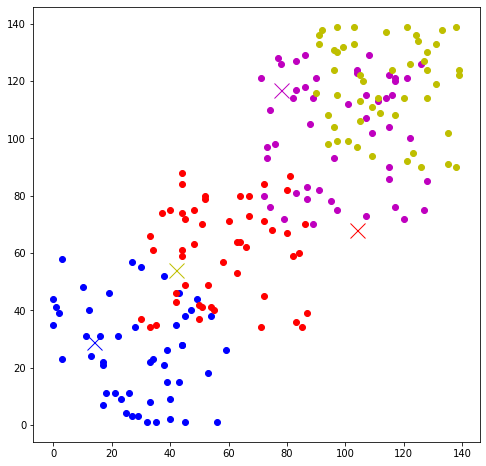

In [399]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(samps_1[:, 0], samps_1[:, 1], 'bo')
ax.plot(samps_2[:, 0], samps_2[:, 1], 'ro')
ax.plot(samps_3[:, 0], samps_3[:, 1], 'mo')
ax.plot(samps_4[:, 0], samps_4[:, 1], 'yo')
ax.plot(*c1, 'bx', markersize=15)
ax.plot(*c2, 'rx', markersize=15)
ax.plot(*c3, 'mx', markersize=15)
ax.plot(*c4, 'yx', markersize=15)
plt.show()

In [400]:
# fig, ax = plt.subplots(figsize=(8, 8))
points = ['b', 'r', 'g', 'm', 'c', 'k']
costs = []

n = 150
samps = np.append(samps_1, samps_2, 0)
samps = np.append(samps, samps_3, 0)
samps = np.append(samps, samps_4, 0)
np.random.shuffle(samps)
centroids = [c1, c2, c3, c4]
groups = [[] for _ in range(len(centroids))]
while n > 0:
    # Cluster assigment
    for i, e in enumerate(samps):
        distances = [np.linalg.norm(e - c) for c in centroids]
        min_idx = np.argmin(distances)
        groups[min_idx].append(i)
        for g in groups[:min_idx] + groups[min_idx+1:]:
            if i in g:
                g.remove(i)

    # Move centroid
    moves = [np.mean(samps[g], axis=0) for g in groups]
    costs.append(np.sum([np.linalg.norm(c-m) for c, m in zip(centroids, moves)]))
    centroids = moves
    n -= 1
#     plt.figure()
#     for c, p, g in zip(centroids, points, groups):
#         plt.plot(samps[g][:, 0], samps[g][:, 1], p+'o')
#         plt.plot(*c, p+'x', markersize=15)
#     plt.show()

0.001077033477403211


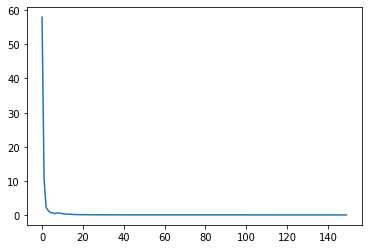

In [401]:
plt.plot(costs)
print(np.min(costs))

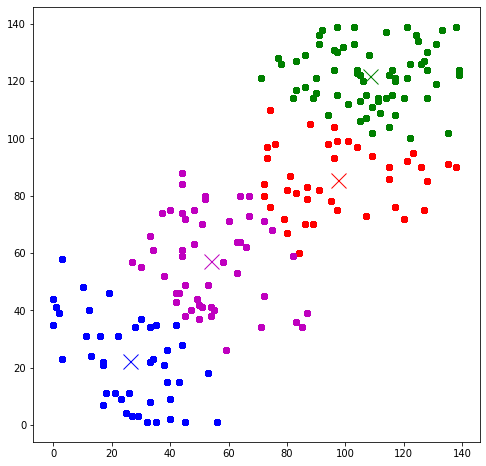

In [402]:
fig, ax = plt.subplots(figsize=(8, 8))
points = ['b', 'r', 'g', 'm']
for c, p, g in zip(centroids, points, groups):
    ax.plot(samps[g][:, 0], samps[g][:, 1], p+'o')
    ax.plot(*c, p+'x', markersize=15)
plt.show()